## Минимизация гладкой функции
1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) exp(x / 10) + 5 exp(-x / 2), но теперь уже на промежутке [1, 30]


In [1]:
from math import sin, exp

def func1(x):
    return sin(x / 5.) * exp(x / 10.) + 5. * exp(-x/ 2.)

In [3]:
import numpy as np

xArr1 = np.arange(1., 31.)
print (xArr1)
print ("Shape x:", xArr1.shape)
yArr1 = np.array([func1(x) for x in xArr1])
print (yArr1)
print ("Shape y:", yArr1.shape)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
Shape x: (30,)
[  3.25221687   2.31503384   1.87783842   1.74684595   1.7977761
   1.94722128   2.13543898   2.31617016   2.45082365   2.50541641
   2.44929128   2.2550105    1.89904466   1.36300335   0.63522142
  -0.28745171  -1.39780121  -2.67647563  -4.09044301  -5.59182909
  -7.11729817  -8.58813805  -9.91120472 -10.98086747 -11.68207055
 -11.89459075 -11.49852141 -10.38095272  -8.44374503  -5.61220878]
Shape y: (30,)


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

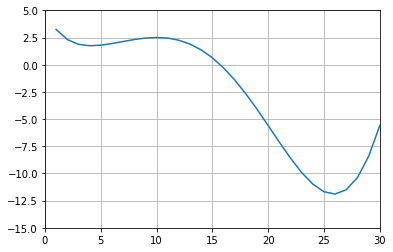

In [5]:
plt.plot(xArr1, yArr1)
plt.grid(True)
plt.axis([0, 30, -15, 5])
plt.show()

2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [33]:
from scipy.optimize import minimize

In [34]:
minFunc1Value1 = minimize(func1, 5)

In [41]:
print ("Minimized f(x) (standard method): ", np.round(minFunc1Value1.fun, 3), "for x = ", np.round(minFunc1Value1.x, 3))
print ("Number of iterations: ", minFunc1Value1.nit)

Minimized f(x) (standard method):  1.745 for x =  [4.136]
Number of iterations:  6


6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [48]:
minFunc1Value2 = minimize(func1, 2, method = 'BFGS')
print ("Minimized f(x) (BFGS method): ", round(minFunc1Value2.fun, 3), "for x = ", np.round(minFunc1Value2.x, 3))
print ("Number of iterations: ", minFunc1Value2.nit)

minValuesAnswer1 = np.zeros( (2) )
minValuesAnswer1[0] = round(minFunc1Value2.fun, 2)
print (minValuesAnswer1)

Minimized f(x) (BFGS method):  1.745 for x =  [4.136]
Number of iterations:  6
[1.75 0.  ]


7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [53]:
minFunc1Value3 = minimize(func1, 30, method = 'BFGS')
print ("Minimized f(x) (BFGS method): ", round(minFunc1Value3.fun, 3), "for x = ", np.round(minFunc1Value3.x, 3))
print ("Number of iterations: ", minFunc1Value3.nit)

minValuesAnswer1[1] = round(minFunc1Value3.fun, 2)
print (minValuesAnswer1)

Minimized f(x) (BFGS method):  -11.899 for x =  [25.88]
Number of iterations:  6
[  1.75 -11.9 ]


8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [54]:
print (minValuesAnswer1)

[  1.75 -11.9 ]


In [55]:
with open("homework1.txt", "w") as fAnswer:
    for item in minValuesAnswer1:
        fAnswer.write(str(item) + ' ')

## Глобальная оптимизация
1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [58]:
from scipy.optimize import differential_evolution

bounds = [(1, 30)]
minFunc1Value4 = differential_evolution(func1, bounds)
print ("Minimized f(x) (differential evolution): ", round(minFunc1Value4.fun, 3), "for x = ", np.round(minFunc1Value4.x, 3))
print ("Number of iterations: ", minFunc1Value4.nit)

Minimized f(x) (differential evolution):  -11.899 for x =  [25.88]
Number of iterations:  6


In [59]:
with open("homework2.txt", "w") as fAnswer:
    fAnswer.write(str(round(minFunc1Value4.fun, 2)))

## Минимизация негладкой функции
1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

In [61]:
def func2(x): return int(func1(x))

xArr2 = np.arange(1., 31., 0.01)
print (xArr2)
print ("Shape x:", xArr2.shape)
yArr2 = np.array([func2(x) for x in xArr2])
print (yArr2)
print ("Shape y:", yArr2.shape)

[ 1.    1.01  1.02 ... 30.97 30.98 30.99]
Shape x: (3000,)
[ 3  3  3 ... -1 -1 -1]
Shape y: (3000,)


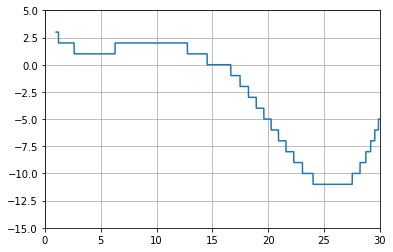

In [63]:
plt.plot(xArr2, yArr2)
plt.grid(True)
plt.axis([0, 30, -15, 5])
plt.show()

3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [64]:
minFunc2Value1 = minimize(func2, 30, method = 'BFGS')
print ("Minimized f(x) (BFGS method): ", round(minFunc2Value1.fun, 3), "for x = ", np.round(minFunc2Value1.x, 3))
print ("Number of iterations: ", minFunc2Value1.nit)

minValuesAnswer2 = np.zeros( (2) )
minValuesAnswer2[0] = round(minFunc2Value1.fun, 2)
print (minValuesAnswer2)

Minimized f(x) (BFGS method):  -5 for x =  [30.]
Number of iterations:  0
[-5.  0.]


4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

In [65]:
minFunc2Value2 = differential_evolution(func2, bounds)
print ("Minimized f(x) (BFGS method): ", round(minFunc2Value2.fun, 3), "for x = ", np.round(minFunc2Value2.x, 3))
print ("Number of iterations: ", minFunc2Value2.nit)

minValuesAnswer2[1] = round(minFunc2Value2.fun, 2)
print (minValuesAnswer2)

Minimized f(x) (BFGS method):  -11.0 for x =  [26.559]
Number of iterations:  4
[ -5. -11.]


In [66]:
with open("homework3.txt", "w") as fAnswer:
    for item in minValuesAnswer2:
        fAnswer.write(str(item) + ' ')

In [ ]:
pass